In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
#import seaborn as sns

%matplotlib notebook
#%matplotlib

In [2]:
#log_dir='./logs/Model_1231_151359'##This one works SR1
#log_dir='./logs/Model_1231_151822'#Pretty good, but actually has 1 mistake.
#log_dir='./logs/Model_1231_192331'#Good. just sent to nancy
log_dir='./logs/Model_0101_115945'
record_dir=os.path.join(log_dir,'records')

In [3]:
from tboard import file2number
id_str=str(file2number(log_dir))

def split_posneg(real_val,binary_val):
    pos_real=real_val[  np.where(npY==+1)[0] ]
    neg_real=real_val[  np.where(npY==-1)[0] ]
    pos_bin=binary_val[ np.where(npY==+1)[0] ]
    neg_bin=binary_val[ np.where(npY==-1)[0] ]
    return pos_real,neg_real,pos_bin,neg_bin

npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))

Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)

def get_path(name,prefix,log_dir=log_dir):
    listglob=glob2.glob(log_dir+'/records/'+prefix+'*.npy')
    hasname=filter(lambda s:name in s[s.rfind(prefix):], listglob)
    if len(hasname)==1:
        return hasname[0]
    else:
        exactname='_'+name+'.'
        hasname=filter(lambda s:exactname in s[s.rfind(prefix):], listglob)
        if len(hasname)==1:
            return hasname[0]
        else:
            raise ValueError('Multiple matches',[hn[hn.rfind('/'):] for hn in hasname])


In [4]:
W1=np.load(get_path('W1','wwatch'))
W2=np.load(get_path('W2','wwatch'))
W3=np.load(get_path('W3','wwatch'))
W4=np.load(get_path('W4','wwatch'))
W1f,W2f,W3f,W4f=W1[-1],W2[-1],W3[-1],W4[-1]#final weights
delu=np.load(get_path('delu','wwatch'))
deluf=delu[-1]
step=np.load(get_path('step','wwatch'))
gridP=np.load(get_path('Prob','hmwatch'))
gridX=np.load(get_path('gridX','hmwatch'))
Pfinal=gridP[-1,:,:,1]

In [128]:
id_str

'101115945'

In [119]:
W1f

array([[-1.1884648,  1.1078125],
       [-1.1777143,  1.1368964]], dtype=float32)

In [120]:
W2f

array([[ 1.1593938, -1.1534109,  1.163574 ],
       [-1.1592426,  1.1203933, -1.1684284]], dtype=float32)

In [121]:
W3f

array([[ 1.1981366, -1.1329031, -1.1514214, -1.1545026],
       [-1.1707405,  1.1208599,  1.1167843,  1.0797775],
       [ 1.1644833, -1.1515797, -1.167904 , -1.1390824]], dtype=float32)

In [122]:
W4f

array([[ 1.2066654, -1.2222134],
       [-1.1031046,  1.1273849],
       [-1.1142324,  1.1403197],
       [-1.121312 ,  1.0912255]], dtype=float32)

In [129]:
deluf

array([-2.4288788,  2.2304895,  2.2545521,  2.2125375], dtype=float32)

In [130]:
final_weight_dir=os.path.join(record_dir,'final_weights')
if not os.path.exists(final_weight_dir):
    os.makedirs(final_weight_dir)

In [135]:
np.savetxt(final_weight_dir+'/'+id_str+'_W1.txt',W1f)
np.savetxt(final_weight_dir+'/'+id_str+'_W2.txt',W2f)
np.savetxt(final_weight_dir+'/'+id_str+'_W3.txt',W3f)
np.savetxt(final_weight_dir+'/'+id_str+'_delW4.txt',deluf)

<IPython.core.display.Javascript object>


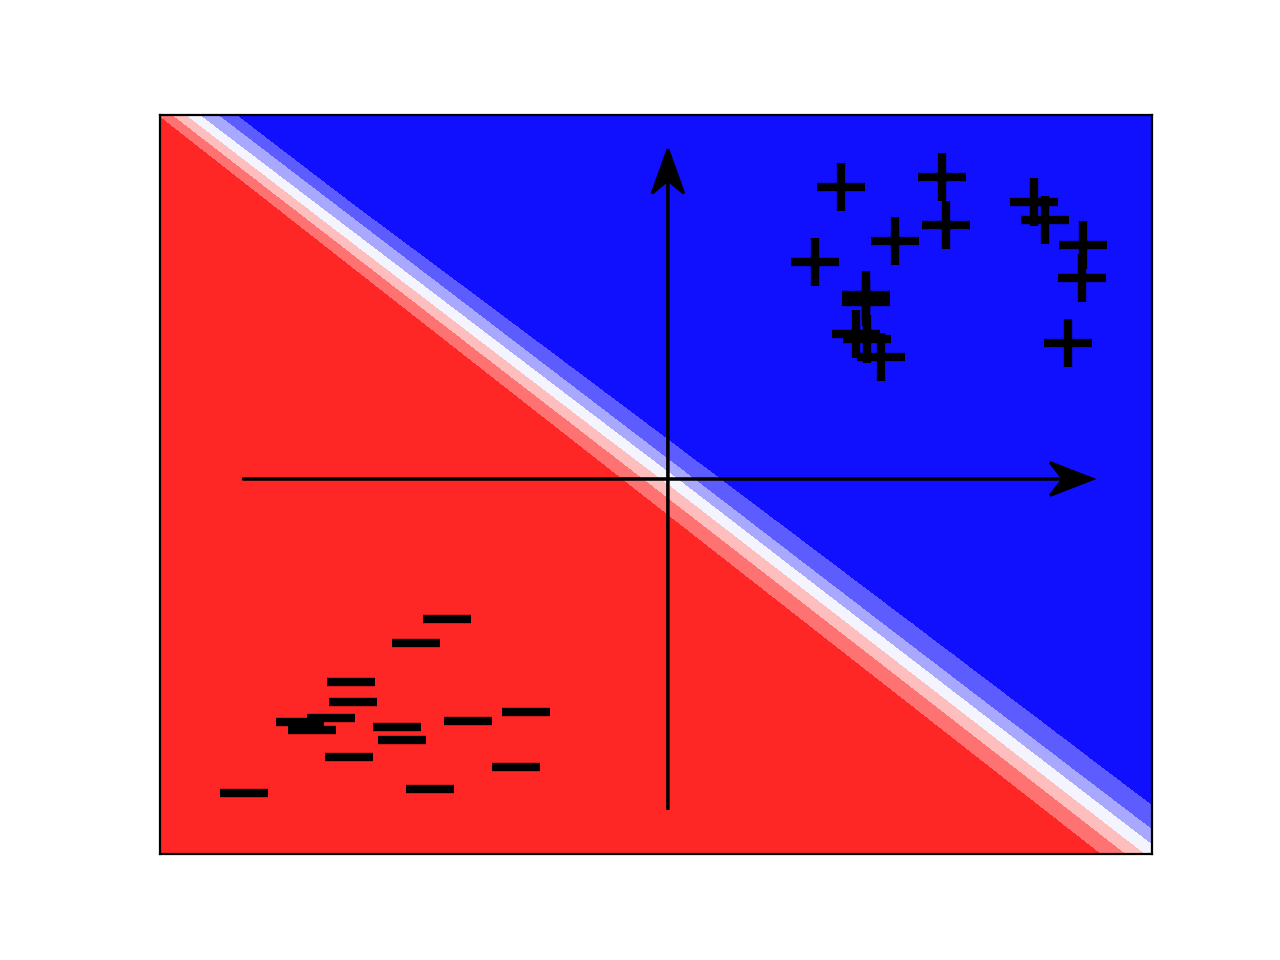

In [137]:
fig,ax=plt.subplots()

levels=np.linspace(0,1,11)#c='b',

ctf=ax.contourf(gridX[:,:,0],gridX[:,:,1],Pfinal,cmap=plt.cm.bwr_r,vmin=0,vmax=1.01)
ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=300,c='k',linewidth='3')
ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=300,c='k',linewidth='3')
#plt.tight_layout()

plt.xticks([]) # labels 
plt.yticks([])
ax.xaxis.set_ticks_position('none') # tick markers
ax.yaxis.set_ticks_position('none')

# get width and height of axes object to compute 
# matching arrowhead length and width
dps = fig.dpi_scale_trans.inverted()
bbox = ax.get_window_extent().transformed(dps)
width, height = bbox.width, bbox.height

xmin=-1.5
xmax=1.5
ymin=-1.5
ymax=1.5
hw = 1./20.*(ymax-ymin) 
hl = 1./20.*(xmax-xmin)
lw = 1. # axis line width
ohg = 0.3 # arrow overhang
yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height
ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
         head_width=hw, head_length=hl, overhang = ohg, 
         length_includes_head= True, clip_on = False) 

ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
         head_width=yhw, head_length=yhl, overhang = ohg, 
         length_includes_head= True, clip_on = False)
plt.savefig(record_dir+'/'+id_str+'_wbarpos_dataclassif.pdf')
#ax.set_aspect('equal')
#ax.grid(True, which='both')
#ax.axhline(y=0, color='k')
#ax.axvline(x=0, color='k')
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)

<IPython.core.display.Javascript object>


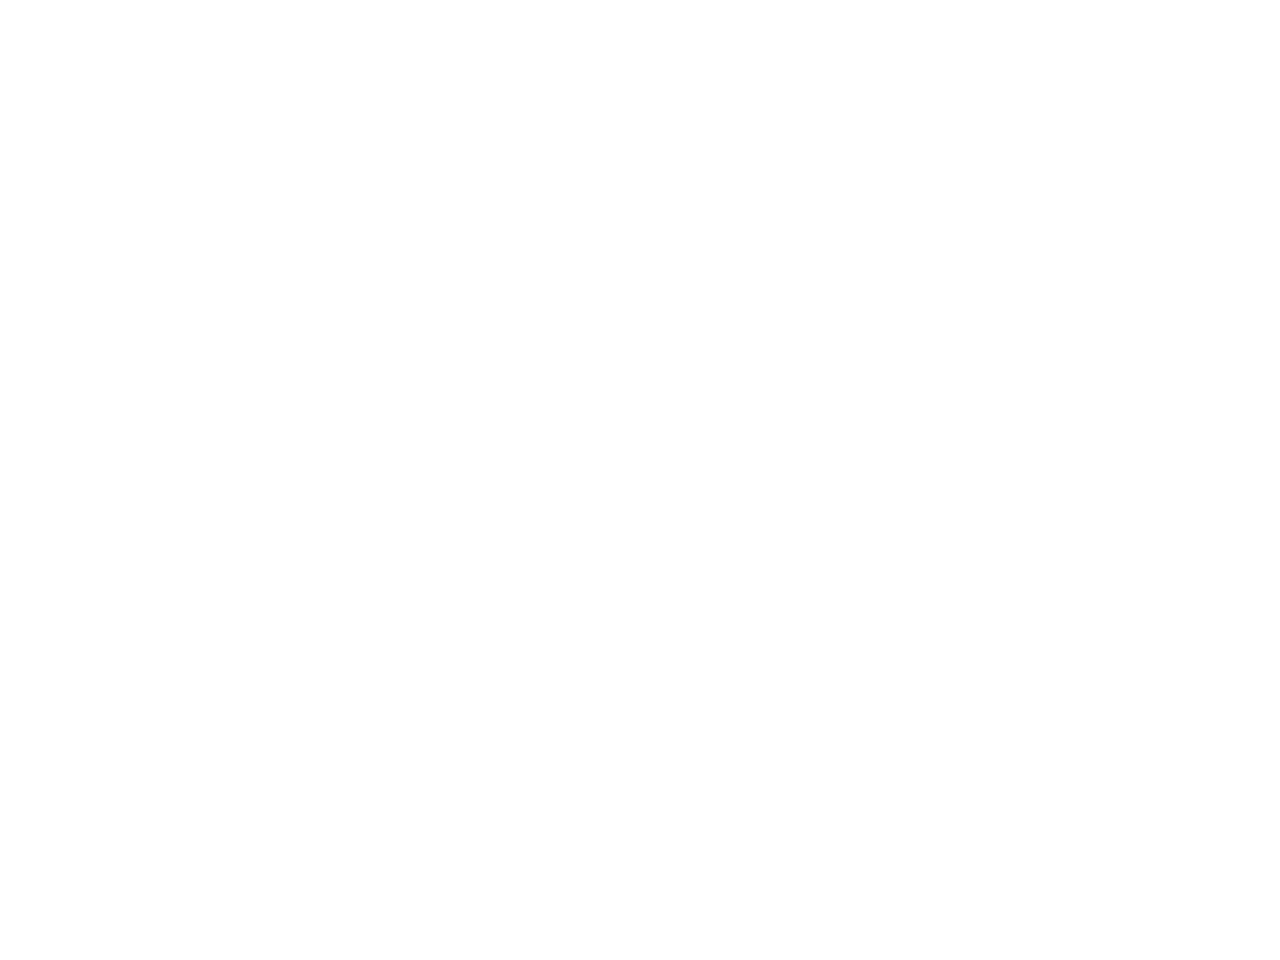

In [133]:
plt.savefig(record_dir+'/'+id_str+'_wbarpos_dataclassif.pdf')

<IPython.core.display.Javascript object>


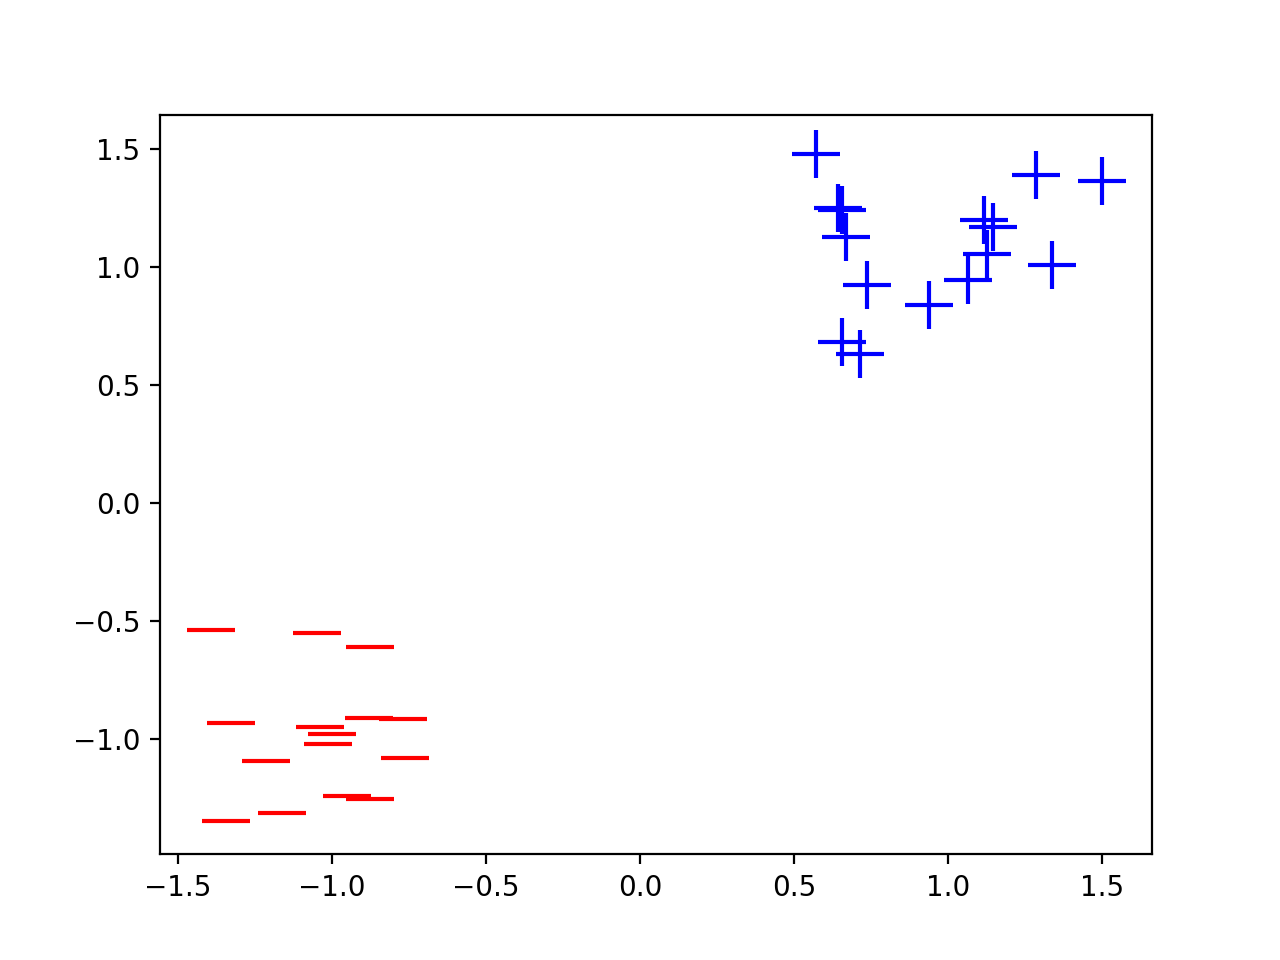

In [49]:
plt.scatter(Xpos[:,0],Xpos[:,1],marker='+',c='b',s=300)
plt.scatter(Xneg[:,0],Xneg[:,1],marker='_',c='r',s=300)
plt.show()